In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Load Dataset

In [164]:
dataset = pd.read_csv('data\weather_dataset.csv', index_col='date', parse_dates=True)

In [165]:
dataset.head()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2015-01-01,14.7,25.3,9.3,NaN,75.0,33.0
2015-01-02,13.9,23.5,7.5,NaN,75.8,37.0
2015-01-03,14.1,21.0,9.5,NaN,83.5,54.0
2015-01-04,16.5,18.8,14.6,NaN,88.3,83.0
2015-01-05,19.0,22.6,16.5,0.0,87.0,72.0


In [166]:
dataset.tail()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2020-12-27,20.3,24.8,17.3,NaN,83.0,67.0
2020-12-28,20.7,23.6,18.8,NaN,88.0,77.0
2020-12-29,21.4,25.8,19.9,NaN,86.0,74.0
2020-12-30,17.5,20.9,16.2,NaN,50.0,42.0
2020-12-31,13.6,19.0,12.1,NaN,57.0,41.0


# Data Preprocessing

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ttb     2192 non-null   float64
 1   Tx      2192 non-null   float64
 2   Tn      2192 non-null   float64
 3   R       988 non-null    float64
 4   Utb     2192 non-null   float64
 5   Un      2192 non-null   float64
dtypes: float64(6)
memory usage: 119.9 KB


### Xoá cột mưa (R) 

In [168]:
dataset.drop('R', axis=1, inplace=True)

In [169]:
dataset.describe()

,Ttb,Tx,Tn,Utb,Un
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,23.350228,28.020073,20.466834,83.805246,67.428832
std,5.042623,5.702109,4.949226,6.906062,13.725397
min,6.100000,8.000000,2.500000,50.000000,23.000000
25%,19.600000,24.000000,17.100000,80.000000,59.000000
50%,24.500000,29.000000,21.600000,84.000000,67.000000
75%,27.500000,32.800000,24.600000,89.000000,77.000000
max,31.500000,39.000000,28.200000,99.000000,98.000000


In [170]:
#dataset.drop('R', axis=1, inplace=True)
#dataset.head()

### Scaling dataset

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [173]:
len(dataset_scaled)

2192

# Splitting Dataset

In [174]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [175]:
rate = 0.2
X, y = dataset_scaled[:-1], dataset_scaled[1:]
pos_split = int(len(X)*(1 - rate))
X_train, X_test, y_train, y_test = X[:pos_split], X[pos_split:], y[:pos_split], y[pos_split:] 
X_train[0].shape

(5,)

In [176]:
from keras.models import Sequential
from keras.layers import Dense

In [177]:
n_features = 5
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(5,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                192       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 5)                 85        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.fit(x=X_train, y=y_train, epochs = 20, verbose =1)

Epoch 1/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 2/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 3/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 4/20
55/55 [==============================] - 0s 844us/step - loss: 0.0169
Epoch 5/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 6/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 7/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 8/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 9/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 10/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 11/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 12/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 13/20
55/55 [============================

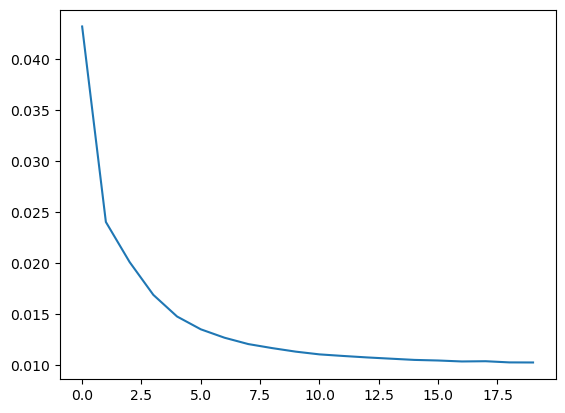

In [179]:
plt.plot(model.history.history['loss'])

# Test

In [180]:
y_predict = model.predict(X_test)
y_predict = y_predict


y_predict = scaler.inverse_transform(y_predict)
y_real = scaler.inverse_transform(y_test)


Ttb_pred, Tx_pred, Tn_pred, Utb_pred, Un_pred = y_predict[1:,0], y_predict[1:,1], y_predict[1:,2], y_predict[1:,3], y_predict[1:,4]

Ttb_real, Tx_real, Tn_real, Utb_real, Un_real = y_real[:-1,0], y_real[:-1,1], y_real[:-1,2], y_real[:-1,3], y_real[:-1,4]

print(np.shape(Ttb_pred), np.shape(Tn_real))


14/14 [==============================] - 0s 1ms/step
(438,) (438,)


In [181]:
np.shape(y_predict)

(439, 5)

# Evaluating

### Ttb (Mean Temperature)

In [182]:
Ttb_MAE = np.array(tf.keras.metrics.mean_squared_error(Ttb_real, Ttb_pred))
Ttb_MAE

array(0.5429749, dtype=float32)

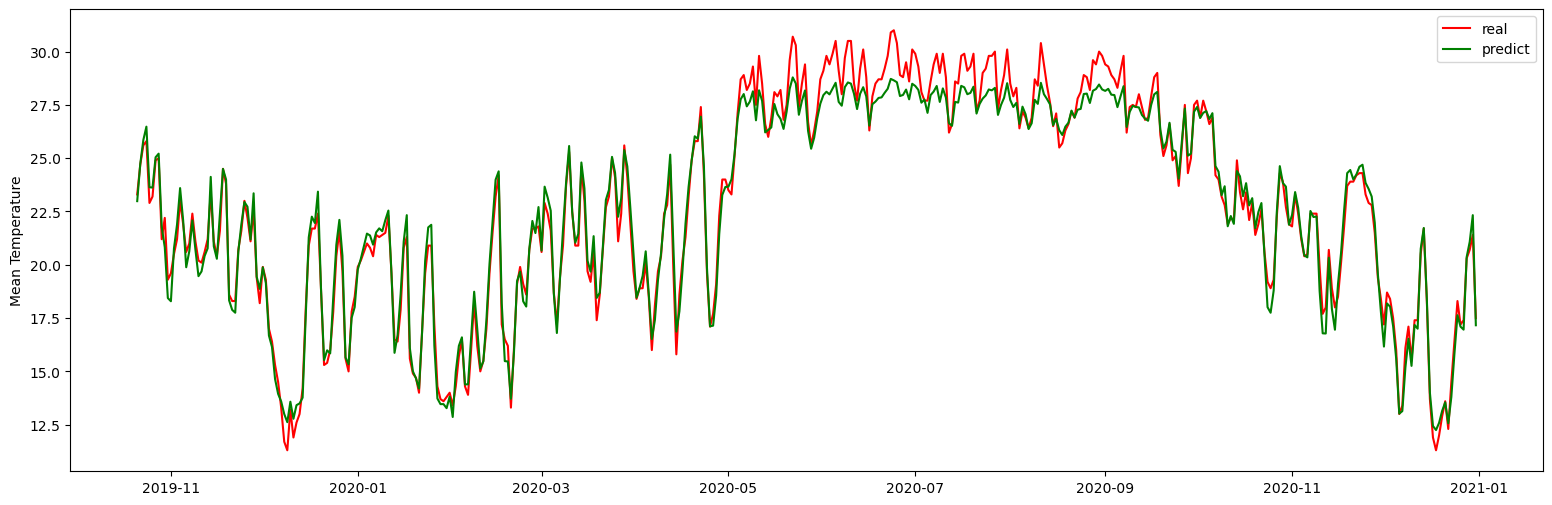

In [183]:
#Visualizing
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Ttb_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Ttb_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Mean Temperature');

### Tx (Max Temperature)

In [184]:
Tx_MAE = np.array(tf.keras.metrics.mean_squared_error(Tx_real, Tx_pred))
Tx_MAE

array(1.622944, dtype=float32)

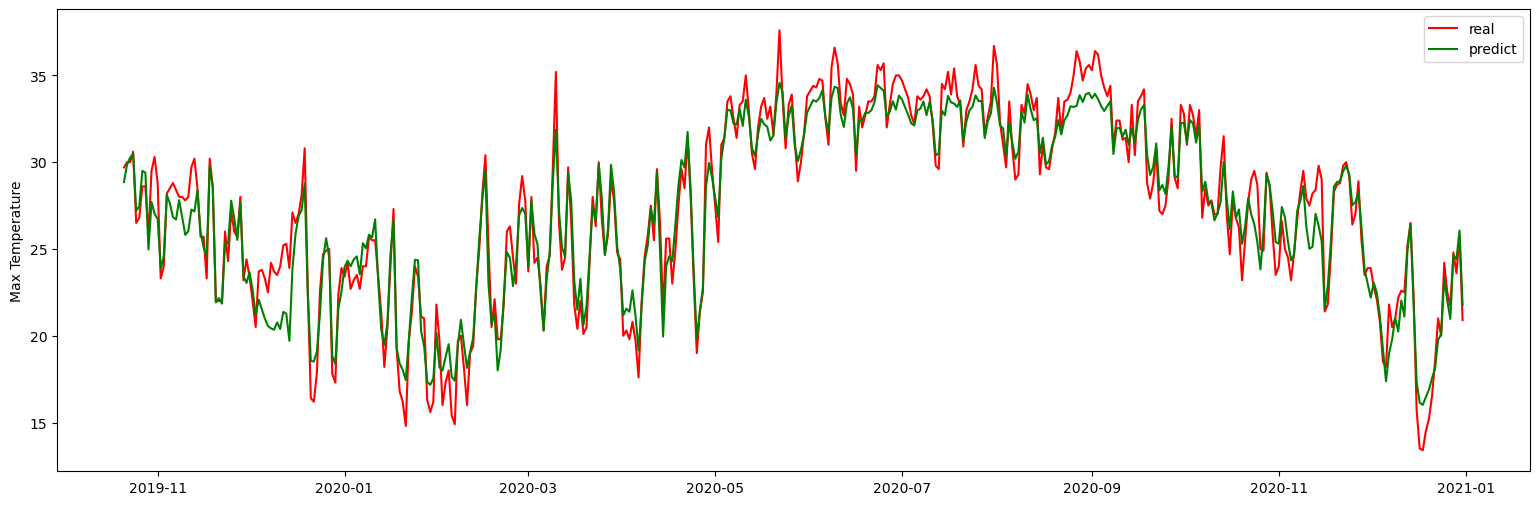

In [185]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Tx_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Tx_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Max Temperature');

### Tn (Min Temperature)

In [186]:
Tn_MAE = np.array(tf.keras.metrics.mean_squared_error(Tn_real, Tn_pred))
Tn_MAE

array(1.1882823, dtype=float32)

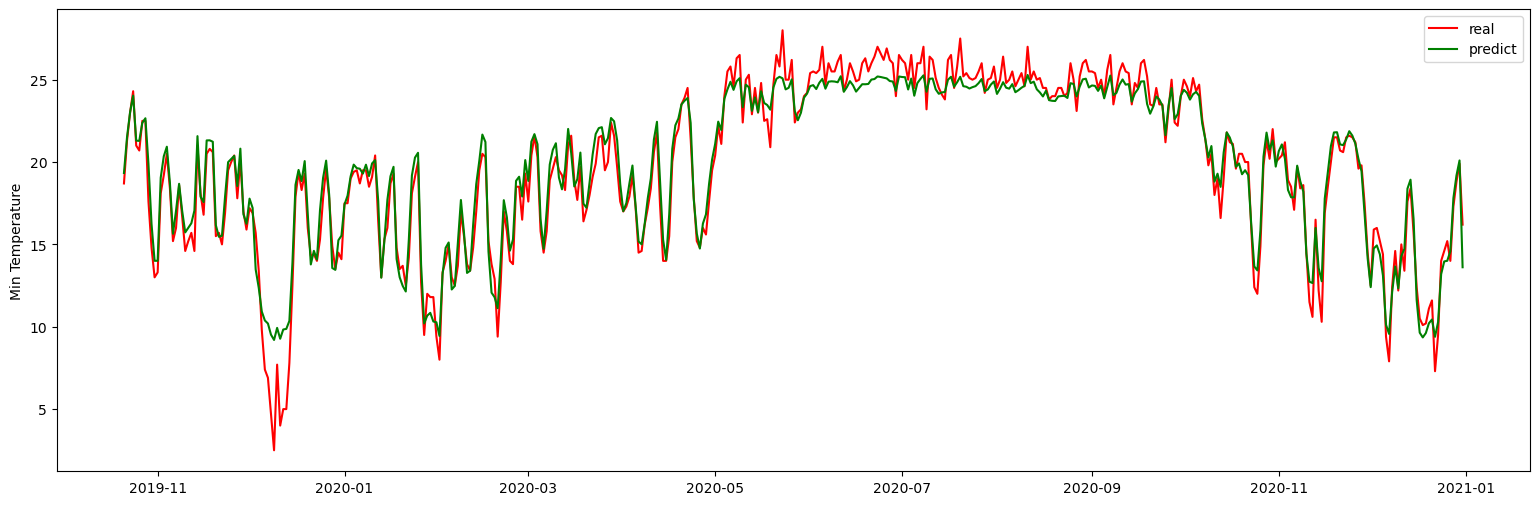

In [187]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Tn_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Tn_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Min Temperature');

### Utb (Mean Humidity)

In [188]:
Utb_MAE = np.array(tf.keras.metrics.mean_squared_error(Utb_real, Utb_pred))
Utb_MAE

array(27.249903, dtype=float32)

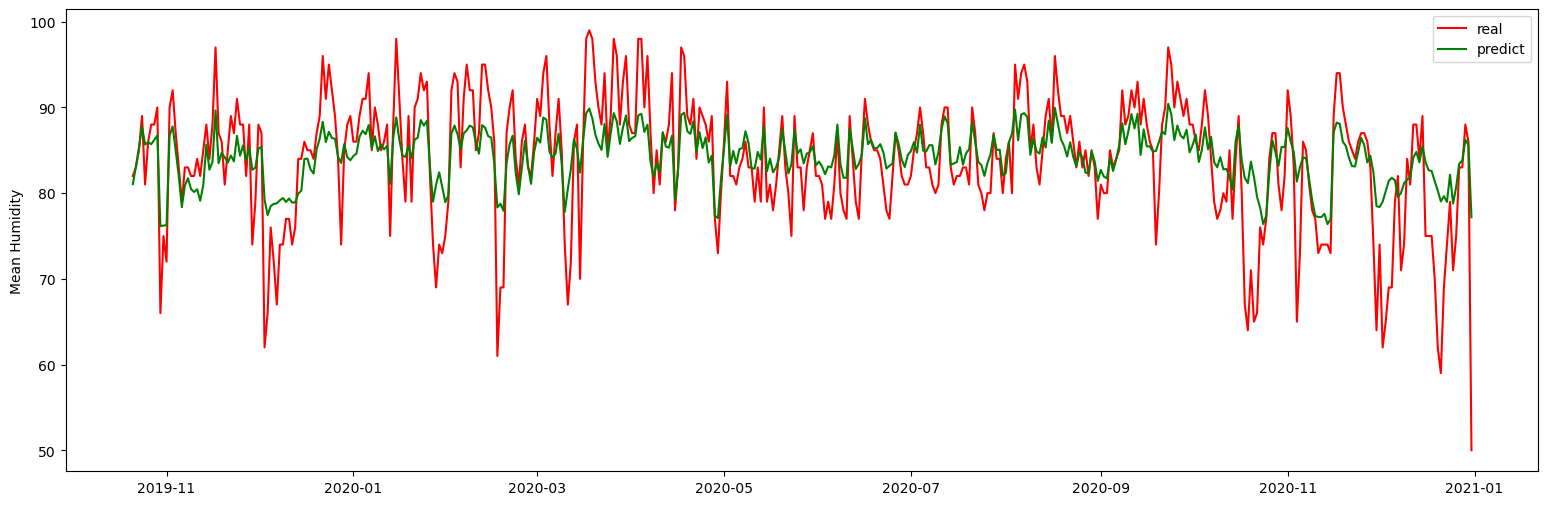

In [189]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Utb_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Utb_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Mean Humidity');

### Un (Min Humidity)

In [193]:
Un_MAE = np.array(tf.keras.metrics.mean_squared_error(Un_real, Un_pred))
Un_MAE

array(36.589924, dtype=float32)

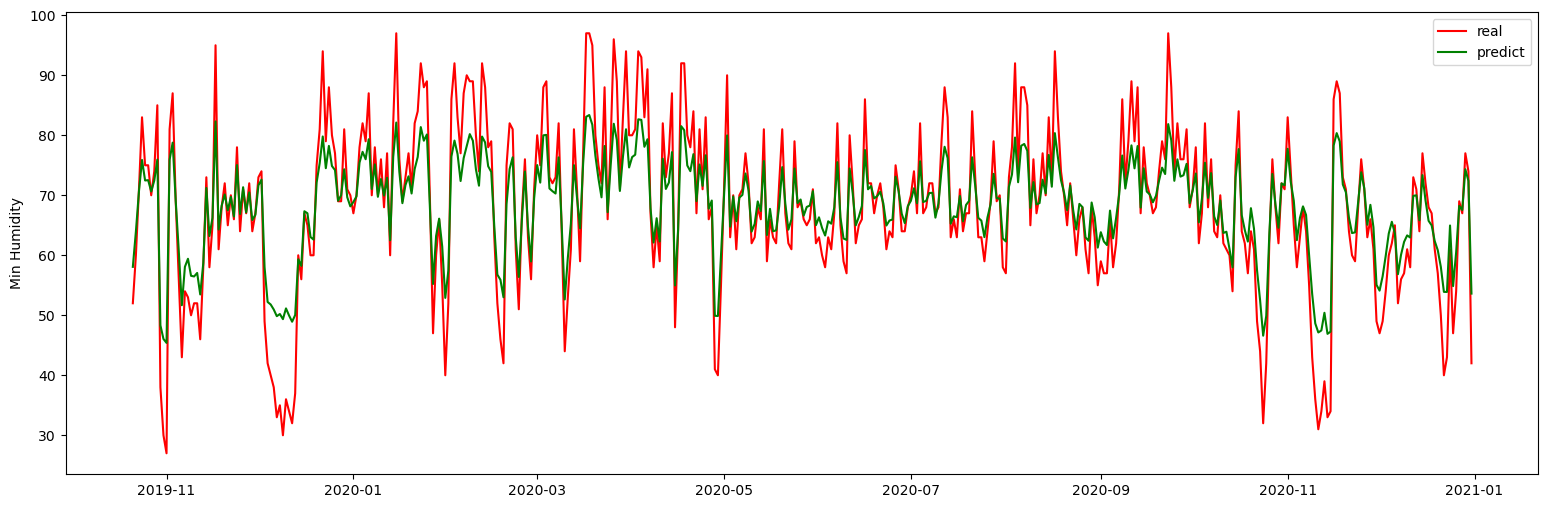

In [194]:
plt.figure(figsize=(19,6))
plt.plot(dataset[pos_split+2:].index, Un_real, c='red', label='real')
plt.plot(dataset[pos_split+2:].index, Un_pred, c='green', label='predict')
plt.legend()
plt.ylabel('Min Humidity');

## Conclusion

In [192]:
result = pd.DataFrame({
    'Predict' : ['Ttb (Nhiệt độ trung bình)', 'Tx (Nhiệt độ cao nhất)', 'Tn (Nhiệt độ thấp nhất)', 'Utb (Độ ẩm trung bình)', 'Un (Độ ẩm thấp nhất)'],
    'MAE' : [Ttb_MAE, Tx_MAE, Tn_MAE, Utb_MAE, Un_MAE]
})

result = result.sort_values(by='MAE', ascending=False)
result = result.set_index('Predict')
result

,MAE
Predict,
Un (Độ ẩm thấp nhất),36.589924
Utb (Độ ẩm trung bình),27.249903
Tx (Nhiệt độ cao nhất),1.622944
Tn (Nhiệt độ thấp nhất),1.1882823
Ttb (Nhiệt độ trung bình),0.5429749
